In [1]:
import scipy.stats as stats

a, b = 500, 600
mu, sigma = 550, 30
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)

values = dist.rvs(1000)



In [3]:
values.shape[0]

(1000,)

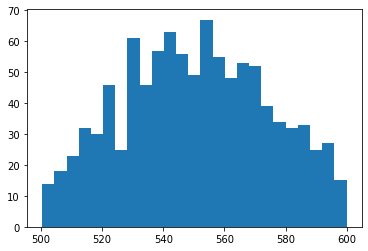

In [4]:
values
import matplotlib.pyplot as plt


plt.hist(values, bins = 25)
plt.show()

In [8]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def my_distribution(min_val, max_val, mean, std):
    """
    https://stackoverflow.com/questions/27831923/python-random-number-generator-with-mean-and-standard-deviation
    """
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

np.random.seed(100)

min_val = 1.5
max_val = 35
mean = 9.87
std = 3.1
my_dist = my_distribution(min_val, max_val, mean, std)

my_dist

mean: 9.87 std: 3.100000000000001
min: 1.9290674232087306 max: 25.03903889816994


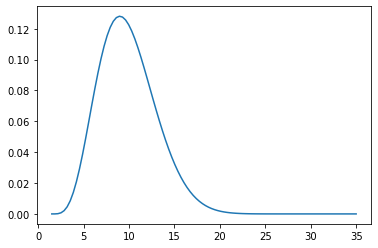

In [9]:
# Plot distribution PDF
x = np.linspace(min_val, max_val, 100)
plt.plot(x, my_dist.pdf(x))
# Stats
print('mean:', my_dist.mean(), 'std:', my_dist.std())
# Get a large sample to check bounds
sample = my_dist.rvs(size=100000)
print('min:', sample.min(), 'max:', sample.max())

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

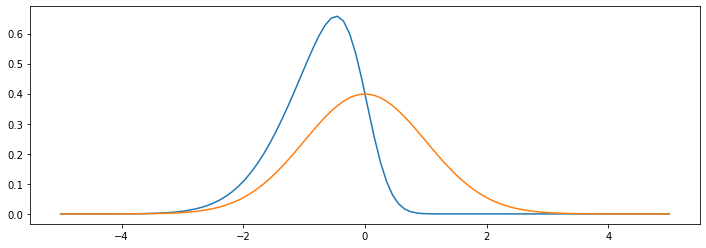

In [17]:
NUM_SAMPLES = 100000
SKEW_PARAMS = [-3, 0]

def skew_norm_pdf(x,e=0,w=1,a=0):
    # adapated from:
    # http://stackoverflow.com/questions/5884768/skew-normal-distribution-in-scipy
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(a*t)

# generate the skew normal PDF for reference:
location = 0.0
scale = 1.0
x = np.linspace(-5,5,100) 

plt.subplots(figsize=(12,4))
for alpha_skew in SKEW_PARAMS:
    p = skew_norm_pdf(x,location,scale,alpha_skew)
    # n.b. note that alpha is a parameter that controls skew, but the 'skewness'
    # as measured will be different. see the wikipedia page:
    # https://en.wikipedia.org/wiki/Skew_normal_distribution
    plt.plot(x,p)

C:\Users\Jan Erik Naess\Anaconda3\envs\ensf411\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jan Erik Naess\Anaconda3\envs\ensf411\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


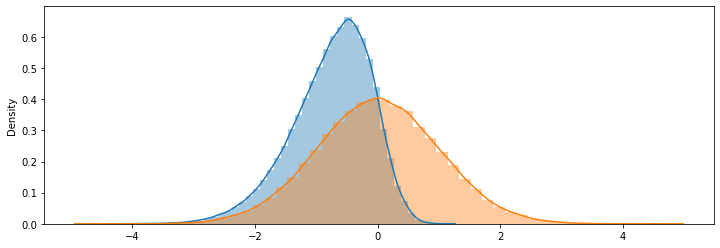

In [19]:
import seaborn as sns

# literal adaption from:
# http://stackoverflow.com/questions/4643285/how-to-generate-random-numbers-that-follow-skew-normal-distribution-in-matlab
# original at:
# http://www.ozgrid.com/forum/showthread.php?t=108175
def rand_skew_norm(fAlpha, fLocation, fScale):
    sigma = fAlpha / np.sqrt(1.0 + fAlpha**2) 

    afRN = np.random.randn(2)
    u0 = afRN[0]
    v = afRN[1]
    u1 = sigma*u0 + np.sqrt(1.0 -sigma**2) * v 

    if u0 >= 0:
        return u1*fScale + fLocation 
    return (-u1)*fScale + fLocation 

def randn_skew(N, skew=0.0):
    return [rand_skew_norm(skew, 0, 1) for x in range(N)]

# lets check they at least visually match the PDF:
plt.subplots(figsize=(12,4))
for alpha_skew in SKEW_PARAMS:
    p = randn_skew(NUM_SAMPLES, alpha_skew)
    sns.distplot(p)

C:\Users\Jan Erik Naess\Anaconda3\envs\ensf411\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jan Erik Naess\Anaconda3\envs\ensf411\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


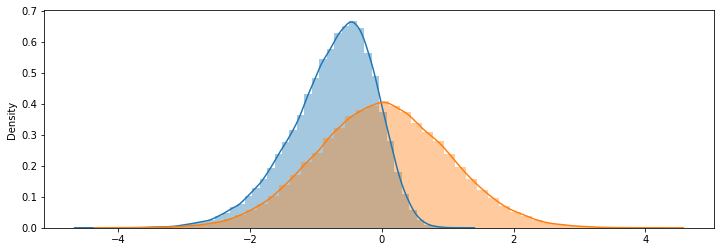

In [20]:
def randn_skew_fast(N, alpha=0.0, loc=0.0, scale=1.0):
    """
    Desc:
    Input:
        N, number of samples
        alpha, alpha skew
        loc, central location
        scale"""
    sigma = alpha / np.sqrt(1.0 + alpha**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1

# lets check again
plt.subplots(figsize=(12,4))
for alpha_skew in SKEW_PARAMS:
    p = randn_skew_fast(NUM_SAMPLES, alpha_skew)
    sns.distplot(p)
    

In [27]:
p = []
for alpha_skew in SKEW_PARAMS:
    p.append(randn_skew_fast(NUM_SAMPLES, alpha_skew))

In [31]:
p[1].std()

1.0012755921906986

In [33]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
s.shape == s.shape

True

In [47]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

class PositionGenerator():
    """
    This class E and N generates positions based on std
    """
    
    def __init__(self, std=[1,1], mean=[0,0], count = 1000):
        """
        Desc:
        Input:
            std, standard deviation [E, N]
            mean, [E, N]
            count, the number of points to generate
        """
        self.std = std
        self.mean = mean
        self.count = count
        
        #generate base set of points
        self.generate()
        
    def generate(self):
        """
        Desc:
            Generates the points for future use or to be plotted
            **assumes normal distribution**
        Input:
            self.std
            seld.mean,
            self.count
        """
        self.E = np.random.normal(self.mean[0], self.std[0], self.count)
        self.N = np.random.normal(self.mean[1], self.std[1], self.count)
        
    def plot(self):
        """
        Desc:
            Plots all E and N points that have been generated on a 2D graph
        Input:
            self.N
            self.E
        """
        #check that there are points and equal lengths
        if self.N.shape == self.E.shape and self.N.shape[0] > 0:

            plt.scatter(self.E, self.N)

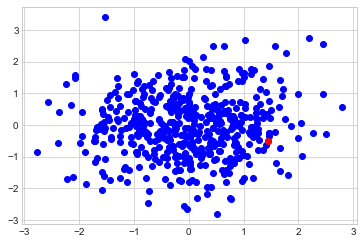

In [4]:
from classes import PositionGenerator
%matplotlib inline

PG = PositionGenerator(count = 500)
PG.plot(pick_one = True)